# Data Mining Project | Amazing International Airlines Inc.

In [116]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Business Understanding

...

## Data Understanding

### Customer Database

#### Reading the data

In [117]:
customer_data = pd.read_csv("DM_AIAI_CustomerDB.csv",index_col=0)
customer_data.set_index("Loyalty#", inplace=True)

#### Metadata
- *Loyalty#* - Unique customer identifier for loyalty program members
- *First Name* - Customer's first name
- *Last Name* -	Customer's last name
- *Customer Name* - Customer's full name (concatenated)
- *Country* - Customer's country of residence
- *Province or State* - Customer's province or state
- *City* - Customer's city of residence
- *Latitude* - Geographic latitude coordinate of customer location
- *Longitude* - Geographic longitude coordinate of customer location
- *Postal code* - Customer's postal/ZIP code
- *Gender* - Customer's gender
- *Education* - Customer's highest education level (Bachelor, College, etc.)
- *Location Code*- Urban/Suburban/Rural classification of customer residence
- *Income* - Customer's annual income
- *Marital Status* - Customer's marital status (Married, Single, Divorced)
- *LoyaltyStatus* - Current tier status in loyalty program (Star > Nova > Aurora)
- *EnrollmentDateOpening* - Date when customer joined the loyalty program
- *CancellationDate* - Date when customer left the program
- *Customer Lifetime Value* - Total calculated monetary value of customer relationship
- *EnrollmentType* - Method of joining loyalty program


#### Initial Analysis
General idea of the data structure, column names and types of values each variable contains.

In [118]:
customer = customer_data.copy()
customer.head(3)

,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
Loyalty#,,,,,,,,,,,,,,,,,,,
480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard


In [119]:
print(f"Numbers of lines and columns: {customer.shape}")

Numbers of lines and columns: (16921, 19)


In [120]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 480934 to 100016
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   First Name               16921 non-null  object 
 1   Last Name                16921 non-null  object 
 2   Customer Name            16921 non-null  object 
 3   Country                  16921 non-null  object 
 4   Province or State        16921 non-null  object 
 5   City                     16921 non-null  object 
 6   Latitude                 16921 non-null  float64
 7   Longitude                16921 non-null  float64
 8   Postal code              16921 non-null  object 
 9   Gender                   16921 non-null  object 
 10  Education                16921 non-null  object 
 11  Location Code            16921 non-null  object 
 12  Income                   16901 non-null  float64
 13  Marital Status           16921 non-null  object 
 14  LoyaltyStatus        

In [121]:
customer.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
First Name,16921,4941,Deon,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Name,16921,15404,Salberg,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,16921,16921,Emma Martin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,16921,1,Canada,16921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province or State,16921,11,Ontario,5468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16921,29,Toronto,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,16921.0,NaN,NaN,NaN,47.1745,3.307971,42.984924,44.231171,46.087818,49.28273,60.721188
Longitude,16921.0,NaN,NaN,NaN,-91.814768,22.242429,-135.05684,-120.23766,-79.383186,-74.596184,-52.712578
Postal code,16921,75,V6E 3D9,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,16921,2,female,8497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Quality Checks

In [122]:
customer.replace("", np.nan, inplace=True)
customer.isna().sum()

First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

We have 20 customers without income data, 20 customers without Customer Lifetime Value data and 14611 customers without CancellationDate data.

In [123]:
customer.duplicated().sum()

np.int64(0)

We have no duplicated rows in our data.

### Flights Database

#### Reading the data

In [124]:
flight_data = pd.read_csv("DM_AIAI_FlightsDB.csv")

#### Metadata
- *Variable* - Description
- *Loyalty#* - Unique customer identifier linking to CustomerDB
- *Year* -	Year of flight activity record
- *Month* - Month of flight activity record (1-12)
- *YearMonthDate* - First day of the month for the activity period
- *NumFlights* - Total number of flights taken by customer in the month
- *NumFlightsWithCompanions* - Number of flights where customer traveled with companions
- *DistanceKM* - Total distance traveled in kilometers for the month
- *PointsAccumulated* - Loyalty points earned by customer during the month
- *PointsRedeemed* - Loyalty points spent/redeemed by customer during the month
- *DollarCostPointsRedeemed* - Dollar value of points redeemed during the month

#### Initial Analysis

General idea of the data structure, column names and types of values each variable contains.

In [125]:
flight = flight_data.copy()
flight.head(3)

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0


In [126]:
print(f"Numbers of lines and columns: {flight.shape}")

Numbers of lines and columns: (608436, 10)


In [127]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [128]:
flight.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,608436.0,NaN,NaN,NaN,550037.873084,258935.180575,100018.0,326961.0,550834.0,772194.0,999986.0
Year,608436.0,NaN,NaN,NaN,2020.0,0.816497,2019.0,2019.0,2020.0,2021.0,2021.0
Month,608436.0,NaN,NaN,NaN,6.5,3.452055,1.0,3.75,6.5,9.25,12.0
YearMonthDate,608436,36,12/1/2021,16901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFlights,608436.0,NaN,NaN,NaN,3.908107,5.057889,0.0,0.0,0.0,7.2,21.0
NumFlightsWithCompanions,608436.0,NaN,NaN,NaN,0.983944,2.003785,0.0,0.0,0.0,0.9,11.0
DistanceKM,608436.0,NaN,NaN,NaN,7939.341419,10260.421873,0.0,0.0,856.4,15338.175,42040.0
PointsAccumulated,608436.0,NaN,NaN,NaN,793.777781,1025.918521,0.0,0.0,85.275,1533.7125,4204.0
PointsRedeemed,608436.0,NaN,NaN,NaN,235.251678,983.233374,0.0,0.0,0.0,0.0,7496.0
DollarCostPointsRedeemed,608436.0,NaN,NaN,NaN,2.324835,9.725168,0.0,0.0,0.0,0.0,74.0


#### Data Quality Checks

In [129]:
flight.replace("", np.nan, inplace=True)
flight.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

We have no missing data.

In [130]:
flight.duplicated().sum()

np.int64(2903)

We have 2903 duplicated rowns in our data.

# Data Preparation

### Customers Database

#### Data Types

In [131]:
customer.dtypes

First Name                  object
Last Name                   object
Customer Name               object
Country                     object
Province or State           object
City                        object
Latitude                   float64
Longitude                  float64
Postal code                 object
Gender                      object
Education                   object
Location Code               object
Income                     float64
Marital Status              object
LoyaltyStatus               object
EnrollmentDateOpening       object
CancellationDate            object
Customer Lifetime Value    float64
EnrollmentType              object
dtype: object

The Enrollment Date Opening and Cancellation Dates can be converted to datetime type.

In [132]:
customer["EnrollmentDateOpening"] = pd.to_datetime(customer["EnrollmentDateOpening"])
customer["CancellationDate"] = pd.to_datetime(customer["CancellationDate"], errors="coerce")

#### Missing Values

In [133]:
customer[customer["Income"].isna()]

,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
Loyalty#,,,,,,,,,,,,,,,,,,,
999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,R4H 2Y2,female,Bachelor,Urban,NaN,Single,Star,2017-03-07,2017-03-07,NaN,Standard
999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,N6B 1N3,male,College,Rural,NaN,Single,Star,2017-08-22,2017-08-22,NaN,Standard
999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,P8F 5C8,male,College,Rural,NaN,Married,Star,2015-09-12,2015-09-12,NaN,Standard
999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,B6P 6D0,female,College,Rural,NaN,Married,Star,2019-06-10,2019-06-10,NaN,Standard
999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,X3W 5N2,female,College,Suburban,NaN,Married,Star,2019-07-20,2019-07-20,NaN,Standard
999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,P6D 6N2,male,College,Suburban,NaN,Single,Star,2021-03-27,2021-03-27,NaN,Standard
999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,W6H 0Z7,female,College,Suburban,NaN,Married,Star,2015-01-27,2015-01-27,NaN,Standard
999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,B2F 3E1,female,College,Rural,NaN,Married,Star,2016-05-05,2016-05-05,NaN,Standard
999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,B3A 2R0,female,College,Suburban,NaN,Married,Star,2020-03-02,2020-03-02,NaN,Standard


The customers with missing income information also have a Customer Lifetime Value equal to 0, which we believe is because their cancellation date is the same as their enrollment date, and it has no value for the company.

In [134]:
customer_NaN_income = customer["Income"].isna().mean() * 100
print(f"The percentage of customers with missing data about income is {customer_NaN_income:.2f} %.")

The percentage of customers with missing data about income is 0.12 %.


Because the percentage of missing data about income is 0.12 %, it is safe to remove this rows.

In [135]:
customer = customer.dropna(subset=['Income'])

#### Coherence Check

In [136]:
# Number of customers with available values in cancellation date
total_cancel_dates = len(customer[customer["CancellationDate"].notna()])
print(f"Number of available cancellation dates: {total_cancel_dates} ({((total_cancel_dates/len(customer))*100):.2f}%)")

Number of available cancellation dates: 2288 (13.54%)


Missing values in the CancellationDate column (which affects 86.46% of the customer base) are assumed to represent customers who have never officially terminated their loyalty membership. 

In [137]:
# Number of customers with cancelation date before the enrollment date
incoherent_cancel_dates = len(customer[customer['CancellationDate'] < customer['EnrollmentDateOpening']])
print(f"Number of incoherent dates: {incoherent_cancel_dates} ({((incoherent_cancel_dates/total_cancel_dates)*100):.2f}%)")

Number of incoherent dates: 202 (8.83%)


The 202 incoherent dates (CancellationDate < EnrollmentDateOpening) strongly suggest a business scenario where members re-enrolled in the loyalty program. It is possible that the CancellationDate reflects an old membership end,  while EnrollmentDateOpening records the start of their current re-activated membership.

This group represents a valuable segment of returned customers,  which we should give special attention during the segmentation phase. Further analysis confirmed that most of these customers exhibited actual flight activity following their new enrollment date. 

In [138]:
# Number of incoherent enrollment type 
cust_2021_promo = customer[customer["EnrollmentType"] == "2021 Promotion"].copy()
cust_2021_promo["EnrollmentYear"] = cust_2021_promo["EnrollmentDateOpening"].dt.year
incoherent_enrollment_type = cust_2021_promo[cust_2021_promo["EnrollmentYear"] !=2021.0]
print(f"Number of incoherent enrollment type (enrollment out of 2021): {len(incoherent_enrollment_type)}")

Number of incoherent enrollment type (enrollment out of 2021): 172


This check was performed to verify if the categorical feature "2021 Promotion" in EnrollmentType was chronologically coherent with the customer's EnrollmentDateOpening. The result shows that approximately 15% of customers tagged with the "2021 Promotion" were registered in earlier years (2015, 2017,...).

The EnrollmentType variable remains useful for demographic/psychographic segmentation (identifying customers sensitive to incentives), but its value cannot be strictly relied upon for calculating customer longevity.

In [139]:
# Number of customer's names that don´t correspond to concatenation of first name and last name
coherent_names = ( customer["First Name"].str.strip()+" "+customer["Last Name"].str.strip())
incoherent_names_condition = (customer["Customer Name"].str.strip() != coherent_names.str.strip())
incoherent_names = customer[incoherent_names_condition]
print(f"Number of unmatched customer names: {len(incoherent_names)}")

Number of unmatched customer names: 0


Furthermore, comparing Customer Name against the concatenation of First Name and Last Name confirmed zero inconsistencies, demonstrating the perfect integrity of the customer identification fields.

### Flights Database

#### Data Types

In [140]:
flight.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

We decided to change the data types of variables NumFlights, NumFlightsWithCompanions, PointsAccumulated and PointsRedeemed to integers because these variables are discrete.
Also, the YearMonthDate variable can be converted to datetime type.

In [141]:
flight['YearMonthDate'] = pd.to_datetime(flight['YearMonthDate'], errors='coerce')

columns_to_convert = ["NumFlights", "NumFlightsWithCompanions", "PointsAccumulated", "PointsRedeemed"]
flight[columns_to_convert] = flight[columns_to_convert].astype(int)
print(flight[columns_to_convert].dtypes)

NumFlights                  int64
NumFlightsWithCompanions    int64
PointsAccumulated           int64
PointsRedeemed              int64
dtype: object


#### Duplicates

In [142]:
flight[flight.duplicated(keep=False)]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
450,727091,2021,12,2021-12-01,0,0,0.0,0,0,0.0
535,369638,2021,12,2021-12-01,0,0,0.0,0,0,0.0
762,750578,2020,6,2020-06-01,0,0,0.0,0,0,0.0
941,547522,2020,6,2020-06-01,0,0,0.0,0,0,0.0
952,819842,2020,6,2020-06-01,0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
607696,960050,2019,12,2019-12-01,0,0,0.0,0,0,0.0
608110,981508,2019,12,2019-12-01,0,0,0.0,0,0,0.0
608111,981508,2019,12,2019-12-01,0,0,0.0,0,0,0.0
608263,990512,2019,12,2019-12-01,0,0,0.0,0,0,0.0


#### Coherence Check

In [143]:
# Number of flights uncoherent
print(f"Number of uncoherent number of flights: {len(flight[flight["NumFlightsWithCompanions"] > flight["NumFlights"]])}")

# Number of flights with uncoherent data of DistanceKM
print(f"Number of uncoherent number of KMs: {len(flight[flight["DistanceKM"] < flight["NumFlights"]])}")

# Number of points accumulated with 0 KM travelled
incoherent_points_condition = (flight["PointsAccumulated"] >0) & (flight["DistanceKM"] == 0)
incoherent_points = flight[incoherent_points_condition]
print(f"Number of incoherent points accumulated: {len(incoherent_points)}")

# Number of incoherent points redeemed or dollar cost points redeemed
incoherent_dollars_condition = (flight["PointsRedeemed"]>0) & (flight["DollarCostPointsRedeemed"]==0) | (flight["PointsRedeemed"]==0) & (flight["DollarCostPointsRedeemed"]>0)
incoherent_dollars = flight[incoherent_dollars_condition]
print(f"Number of incoherent dollars redeemed: {len(incoherent_dollars)}")

Number of uncoherent number of flights: 0
Number of uncoherent number of KMs: 0
Number of incoherent points accumulated: 0
Number of incoherent dollars redeemed: 0


The flight activity data demonstrates high internal coherence, with zero records showing logical inconsistencies between flight counts, distance traveled, point accumulation and dollar cost of points redeemed.

#### Coherence Check on both databases

The analysis of temporal integrity between the customer and flight databases yielded critical findings.

In [144]:
# Number of incoherent customers flying after customer cancelling the membership
cust_cancelled = customer[customer["CancellationDate"].notna()].copy()

merged_flights_cust_cancel = pd.merge(
    customer[customer["CancellationDate"].notna()][["CancellationDate", "EnrollmentDateOpening"]],
    flight[["Loyalty#", "YearMonthDate", "NumFlights"]],
    left_index=True, right_on= "Loyalty#", how="inner"
)

flights_condition1 = (
    (merged_flights_cust_cancel["YearMonthDate"]> merged_flights_cust_cancel["CancellationDate"]) &
    (merged_flights_cust_cancel["NumFlights"]>0) &
    (merged_flights_cust_cancel["EnrollmentDateOpening"]<=merged_flights_cust_cancel["CancellationDate"])
)

flights1 = merged_flights_cust_cancel[flights_condition1]
print(f"Number of incoherent customers flying after customer cancelling the membership: {flights1["Loyalty#"].nunique()}")

Number of incoherent customers flying after customer cancelling the membership: 0


The first test verified if any customer registered flight activity after their official cancellation date without having subsequently re-enrolled in the loyalty program. The results showed zero unique customers exhibiting this true logical incoherence. The previously observed post-cancellation activity is fully justified by customer re-enrollment, meaning the old CancellationDate simply serves as a historical record rather than a current status flag.

In [145]:
# Number of customers that flyed after re-enrolling the membership
merged_cust_cancel_reenroll_flights = pd.merge(
    customer[customer["CancellationDate"].notna()][["CancellationDate", "EnrollmentDateOpening"]],
    flight[["Loyalty#","YearMonthDate","NumFlights"]],
    left_index=True,right_on="Loyalty#",how="inner"
)

flights_condition2 = (
    (merged_cust_cancel_reenroll_flights["CancellationDate"]<merged_cust_cancel_reenroll_flights["EnrollmentDateOpening"]) &
    (merged_cust_cancel_reenroll_flights["YearMonthDate"] > merged_cust_cancel_reenroll_flights["EnrollmentDateOpening"]) &
    (merged_cust_cancel_reenroll_flights["NumFlights"]>0)
)

flights2 =merged_cust_cancel_reenroll_flights[flights_condition2]
print(f"Number of customers that flyed after re-enrolling the membership: {flights2["Loyalty#"].nunique()}")

Number of customers that flyed after re-enrolling the membership: 175


The second test is the analysis of the 202 customers where the CancellationDate precedes the EnrollmentDateOpening and was performed to validate the hypothesis that these records represent customers who re-enrolled in the membership (as we thought on the Coherence Check of the customers database). 

This result strongly validates the theory that when the CancellationDate precedes the EnrollmentDateOpening, it signifies a business scenario of customer re-enrollment. The post-enrollment flight activity for the vast majority (175 out of 202) of these customers confirms the segment's viability. 

In [146]:
# Number of customers with enrollment date after first flight
min_flights = flight.groupby("Loyalty#")["YearMonthDate"].min().reset_index()
min_flights = min_flights.rename(columns={"YearMonthDate": "MinFlightDate"})
merged_enrollment = pd.merge(
    customer[["EnrollmentDateOpening"]], 
    min_flights,
    left_index=True,right_on="Loyalty#",how="inner"
    )
enrollment_after_flight = merged_enrollment[merged_enrollment["MinFlightDate"] < merged_enrollment["EnrollmentDateOpening"]]
print(f"Number of customers that enrolled to a membership after flying: {enrollment_after_flight["Loyalty#"].nunique()}")

Number of customers that enrolled to a membership after flying: 7984


The third test compared the customer's official EnrollmentDateOpening against their actual earliest recorded flight date. The analysis revealed that 7984 unique customers, representing approximately 47% of the customer base, joined a membership after flying with the company. We conclued that EnrollmentDateOpening is unreliable for accurately measuring customer longevity and that we should adopt the Minimum Flight Date as the definitive true start date for all customers.

In [147]:
customer["CancellationDate"] = customer["CancellationDate"].fillna(pd.Timestamp("1904-01-01"))

## Data Exploration

#### Customer

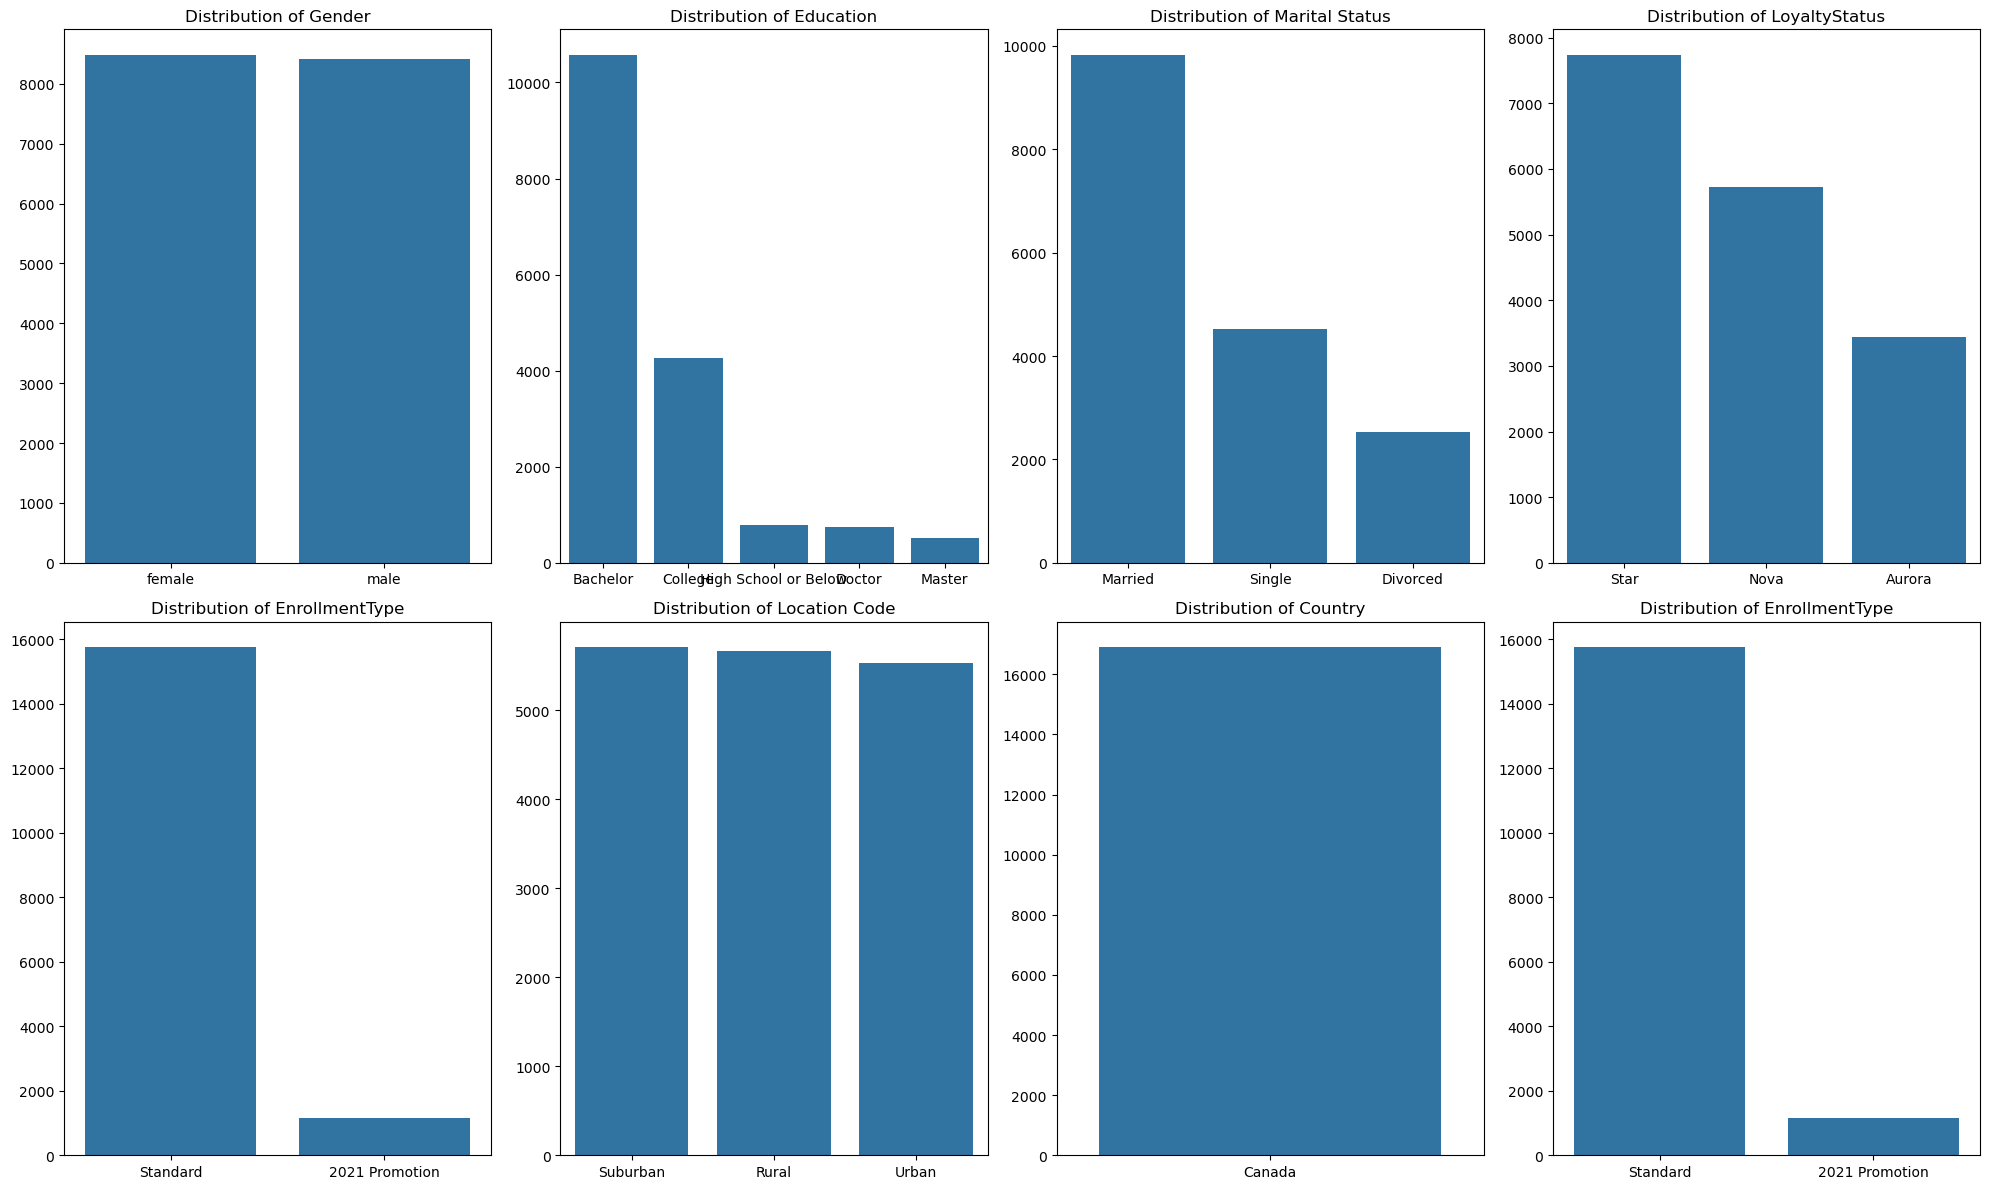

In [148]:

categorical_customer = ["Gender", "Education", "Marital Status", "LoyaltyStatus", "EnrollmentType", "Location Code","Country","EnrollmentType"]

plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_customer, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, data=customer, order=customer[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.show()

### Distributions of Categorical Features
From these visualizations, we observe that the dataset shows no meaningful variation in gender or location type, suggesting that these variables may have limited discriminative power for segmentation.
Regarding education, the majority of loyalty members hold a Bachelor’s degree, followed by those with College-level education.
In terms of marital status, most customers are married, which may indicate a stable and mature demographic segment.
The loyalty status distribution reveals that most clients belong to the Star tier, followed by Nova and Aurora, highlighting a concentration in mid-level membership.
Finally, the enrollment type indicates that the majority of customers joined through the Standard enrollment process, which could suggest limited participation in promotional or referral programs.


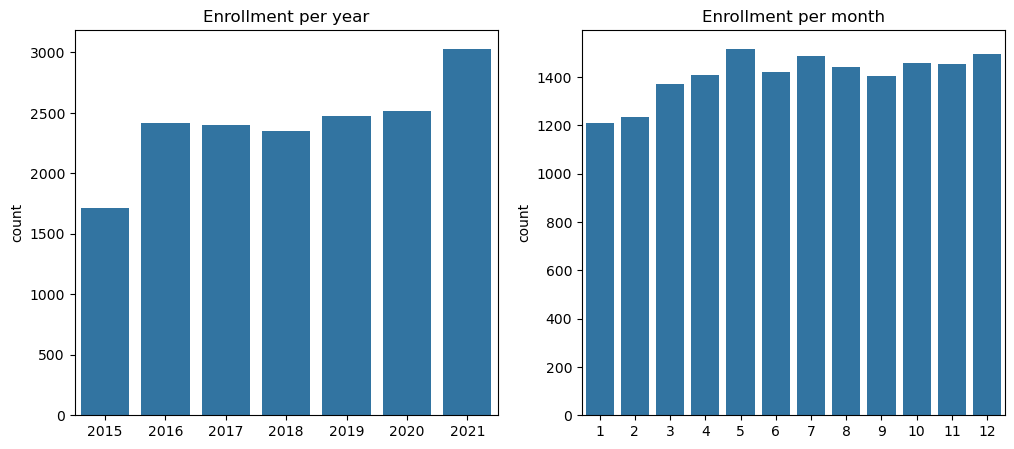

,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
Loyalty#,,,,,,,,,,,,,,,,,,,
480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2019-02-15,1904-01-01,3839.14,Standard
549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,2019-03-09,1904-01-01,3839.61,Standard
429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard


In [149]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=customer["EnrollmentDateOpening"].dt.year, data=customer)
plt.title("Enrollment per year")
plt.xlabel("")

plt.subplot(1, 2, 2)
sns.countplot(x=customer["EnrollmentDateOpening"].dt.month, data=customer)
plt.title("Enrollment per month")
plt.xlabel("")
plt.show()
customer.head(3)

The analysis of enrollment trends shows a stable customer acquisition rate between 2016 and 2020, followed by a significant surge in 2021, which represents the highest volume of new enrollments within the dataset. This latest growth suggests successful recent marketing or promotional efforts and indicates a healthy expansion of the customer base. 2021 Promotion

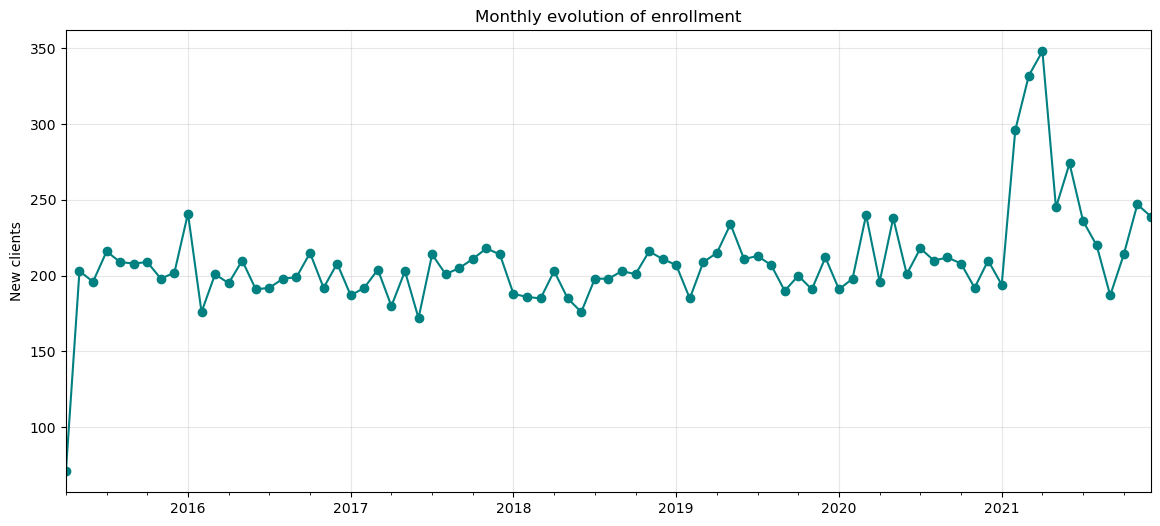

In [150]:
monthly_enrollments = customer.groupby(customer["EnrollmentDateOpening"].dt.to_period("M")).size().sort_index()
# converter índice PeriodIndex para timestamp para plot ficar com labels de datas
monthly_enrollments.index = monthly_enrollments.index.to_timestamp()

plt.figure(figsize=(14, 6))
monthly_enrollments.plot(kind='line', marker='o', color='teal')
plt.title("Monthly evolution of enrollment")
plt.xlabel("")
plt.ylabel("New clients")
plt.grid(True, alpha=0.3)
plt.show()

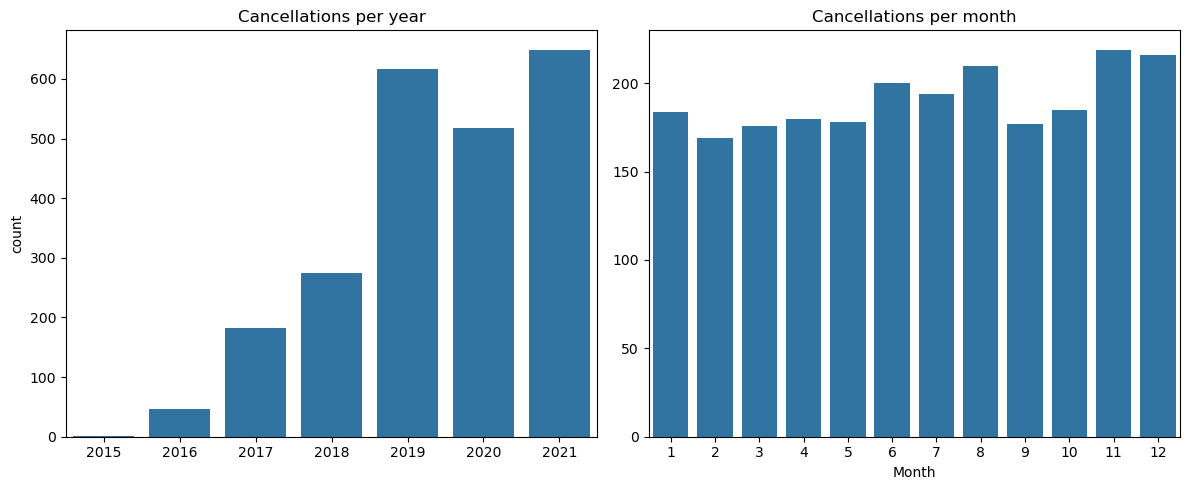

In [168]:

valid_dates = customer["CancellationDate"].dt.year != 1904
customer.loc[valid_dates, "CancellationDateYear"] = customer.loc[valid_dates, "CancellationDate"].dt.year
customer.loc[valid_dates, "CancellationDateMonth"] = customer.loc[valid_dates, "CancellationDate"].dt.month

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=customer.loc[valid_dates, "CancellationDateYear"].astype(int).sort_values())
plt.title("Cancellations per year")
plt.xlabel("")

plt.subplot(1,2,2)
sns.countplot(x=customer.loc[valid_dates, "CancellationDateMonth"].astype(int))
plt.title("Cancellations per month")
plt.xlabel("Month")
plt.ylabel("")
plt.tight_layout()

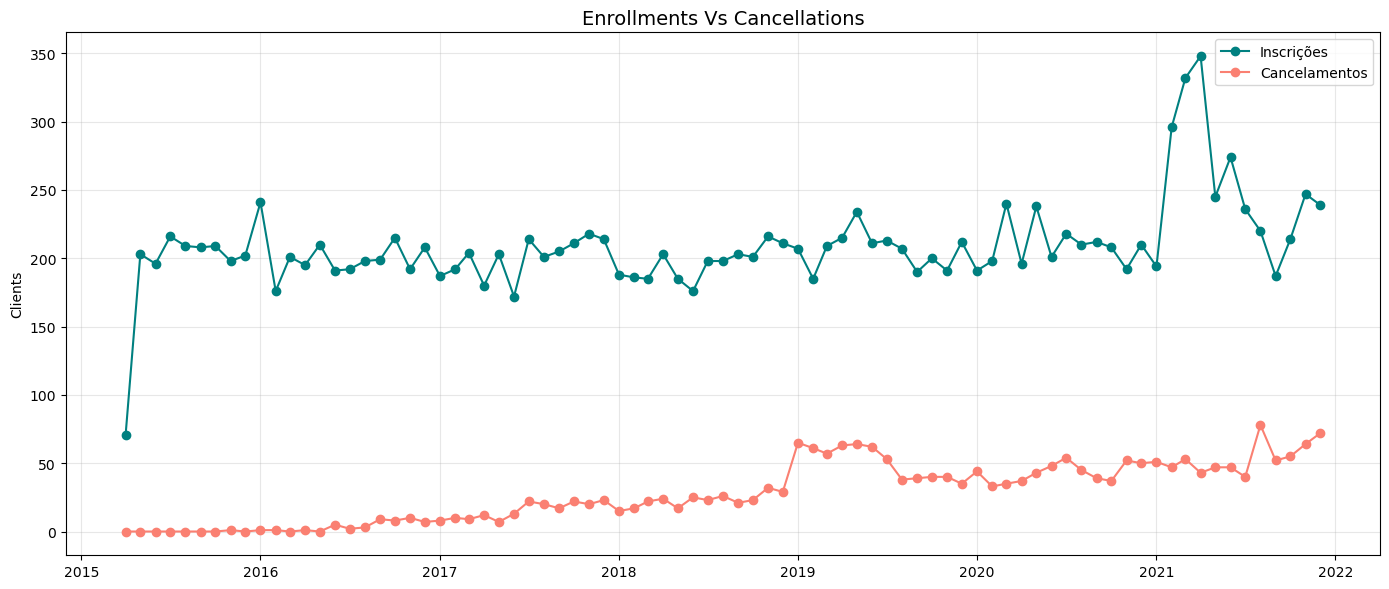

In [167]:
monthly_enroll = customer.groupby(customer["EnrollmentDateOpening"].dt.to_period("M")).size()
monthly_cancel = customer.loc[valid_dates].groupby(customer.loc[valid_dates, "CancellationDate"].dt.to_period("M")).size()

# Criar range completo de meses para alinhar as séries
all_months = pd.period_range(
    start=min(monthly_enroll.index.min(), monthly_cancel.index.min()),
    end=max(monthly_enroll.index.max(), monthly_cancel.index.max()),
    freq="M"
)

# Reindexar para garantir continuidade
monthly_enroll = monthly_enroll.reindex(all_months, fill_value=0)
monthly_cancel = monthly_cancel.reindex(all_months, fill_value=0)

# Converter PeriodIndex em datetime (para eixo legível)
monthly_enroll.index = monthly_enroll.index.to_timestamp()
monthly_cancel.index = monthly_cancel.index.to_timestamp()

plt.figure(figsize=(14,6))
plt.plot(monthly_enroll.index, monthly_enroll, marker='o', label="Inscrições", color='teal')
plt.plot(monthly_cancel.index, monthly_cancel, marker='o', label="Cancelamentos", color='salmon')
plt.title("Enrollments Vs Cancellations", fontsize=14)
plt.xlabel("")
plt.ylabel("Clients")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


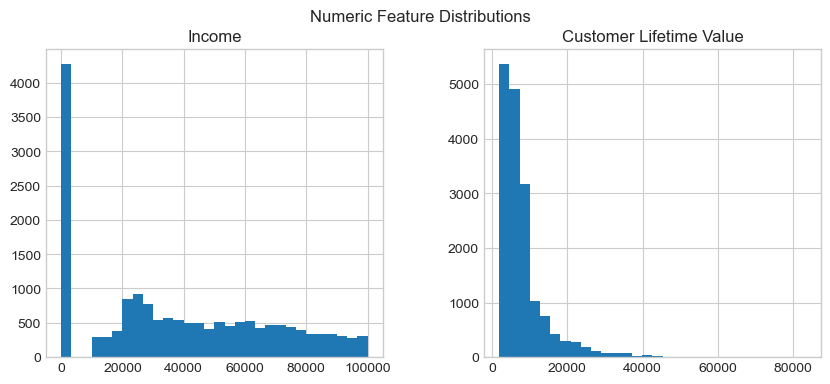

In [ ]:
numeric_customer = ["Income", "Customer Lifetime Value"]
customer[numeric_customer].hist(bins=30 ,figsize=(10,4))
plt.suptitle("Numeric Feature Distributions")
plt.show()


The distributions of Income and Customer Lifetime Value are highly right-skewed, with the vast majority of customers concentrated at low values. The presence of a long tail suggests potential high-value customers, but these instances should be investigated to determine if they represent a genuine business segment (e.g., corporate clients) or data outliers.


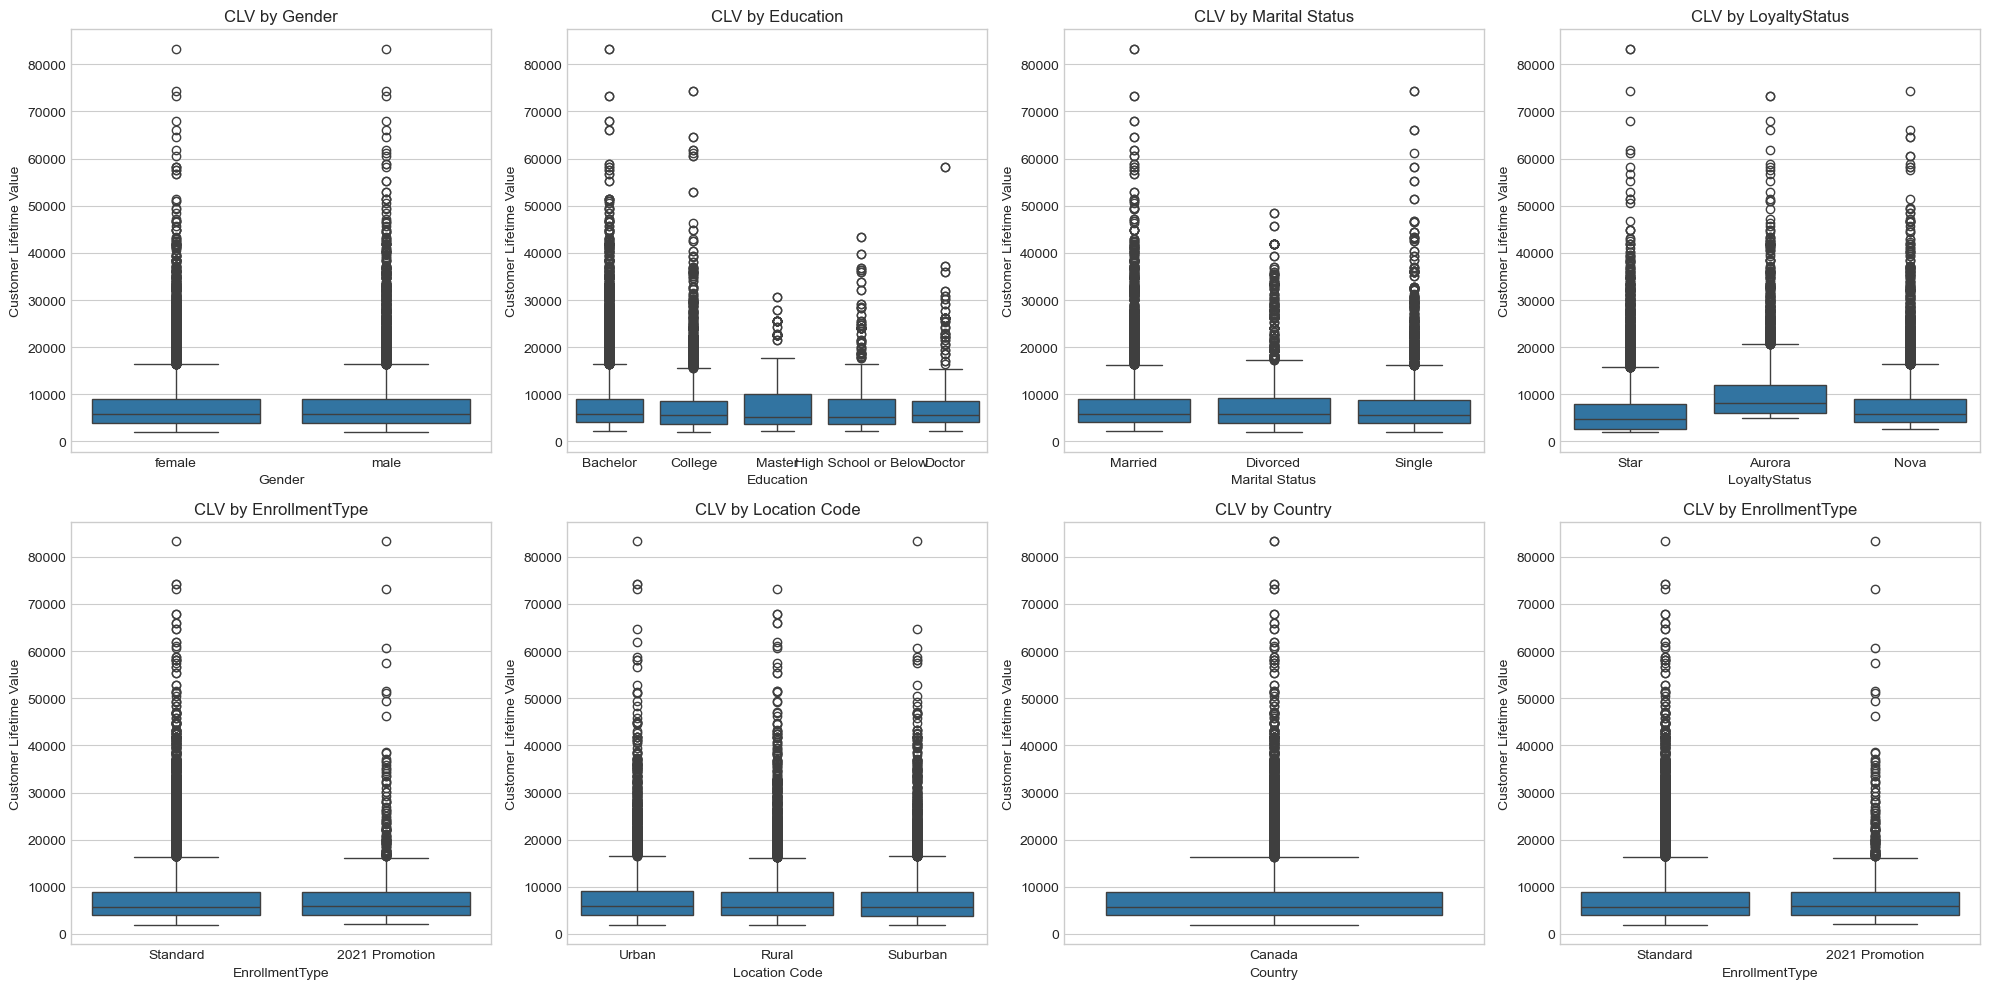

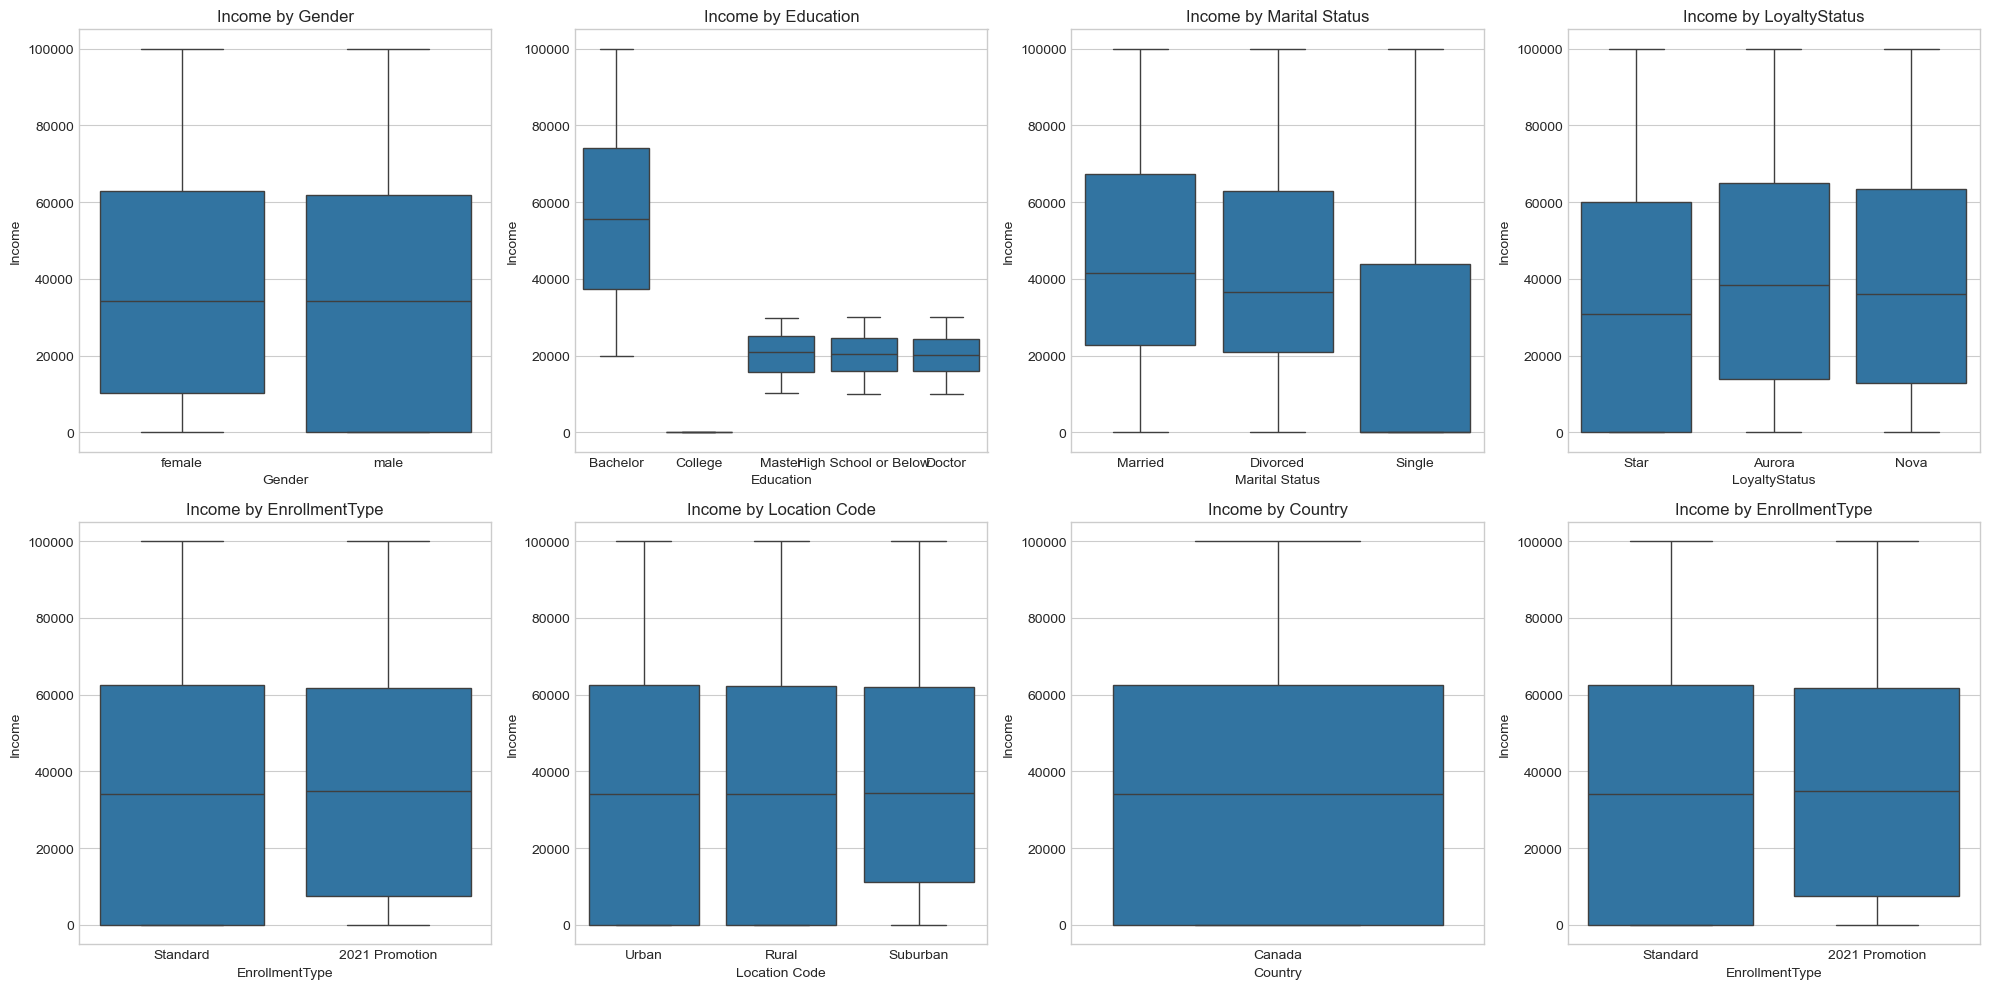

In [ ]:
plt.figure(figsize=(20, 10))
for i, cat_col in enumerate(categorical_customer, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=cat_col, y="Customer Lifetime Value", data=customer)
    plt.title(f"CLV by {cat_col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for i, cat_col in enumerate(categorical_customer, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=cat_col, y="Income", data=customer)
    plt.title(f"Income by {cat_col}")
plt.tight_layout()
plt.show()

In [ ]:
def find_group_outliers(df, group_col, value_col, k=1.5):
    outlier_idx = []
    for name, g in df.groupby(group_col):
        q1 = g[value_col].quantile(0.25)
        q3 = g[value_col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        mask = (g[value_col] < lower) | (g[value_col] > upper)
        outlier_idx.extend(g[mask].index.tolist())
    return df.loc[outlier_idx]

def outliers_for_all(df, cat_cols, value_cols=("Customer Lifetime Value", "Income"), k=1.5):
    results = {}
    for val in value_cols:
        print(f"\n--- {val} ---")
        # compute outliers per categorical column
        for col in cat_cols:
            out = find_group_outliers(df, col, val, k=k)
            results[(col, val)] = out
            print(f"{col}: {len(out)} outliers")
    return results

outliers_dict = outliers_for_all(customer, categorical_customer)



--- Customer Lifetime Value ---
Gender: 1544 outliers
Education: 1556 outliers
Marital Status: 1527 outliers
LoyaltyStatus: 1428 outliers
EnrollmentType: 1538 outliers
Location Code: 1527 outliers
Country: 1541 outliers
EnrollmentType: 1538 outliers

--- Income ---
Gender: 0 outliers
Education: 0 outliers
Marital Status: 0 outliers
LoyaltyStatus: 0 outliers
EnrollmentType: 0 outliers
Location Code: 0 outliers
Country: 0 outliers
EnrollmentType: 0 outliers


### Income Distribution by Loyalty Status
The median Income is similar but slightly lower for the Star loyalty group compared to Aurora and Nova. However, the overall distribution and range of Income across all three groups are highly consistent, with the Interquartile Ranges (IQR) and whiskers spanning similar values (from approximately $0 to $100,000). This suggests that Loyalty Status is not a strong differentiator of customer income levels.

### Customer liftime value by Loyalty Status
The plot shows that high-CLV customers (outliers) are not segregated within a single, premium loyalty status; they are present across all three loyalty statuses (Star, Aurora, and Nova). While the Aurora tier shows a slightly higher median CLV, the overall pattern suggests that Loyalty Status is a poor predictor of a customer's lifetime value.

### Income Distribution by Education Level
The analysis reveals that a Bachelor's degree is the dominant factor determining high customer income, with this group showing a significantly higher median and broader Interquartile Range (IQR) than all others. In contrast, Master's, High School, and Doctor levels show consistently low and similar median incomes. Crucially, the College category displays a median income of zero, pointing to a severe data quality issue (missing or improperly coded income values) that must be addressed prior to any predictive modeling.

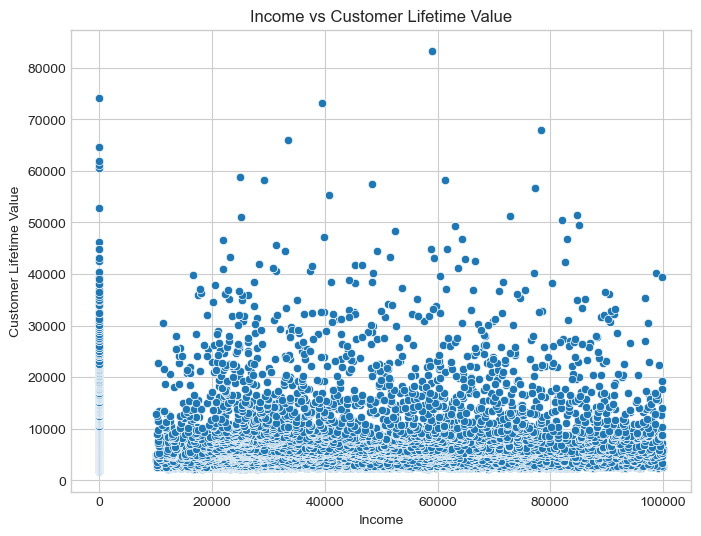

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Customer Lifetime Value', data=customer)
plt.title('Income vs Customer Lifetime Value')
plt.show()

The scatter plot confirms that there is no strong linear correlation between Income and Customer Lifetime Value (CLV). High-CLV customers (the upper outliers) are observed across the entire income spectrum, demonstrating that a customer's purchasing power is not the primary driver of their long-term value. This suggests that predictive models should prioritize behavioral features over income.

#### Flights Insights 

In [ ]:
flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty#,608436.0,550037.873084,258935.180575,100018.0,326961.00,550834.0,772194.000,999986.0
Year,608436.0,2020.000000,0.816497,2019.0,2019.00,2020.0,2021.000,2021.0
Month,608436.0,6.500000,3.452055,1.0,3.75,6.5,9.250,12.0
NumFlights,608436.0,3.827226,5.017513,0.0,0.00,0.0,7.000,21.0
NumFlightsWithCompanions,608436.0,0.932188,1.965252,0.0,0.00,0.0,0.000,11.0
DistanceKM,608436.0,7939.341419,10260.421873,0.0,0.00,856.4,15338.175,42040.0
PointsAccumulated,608436.0,793.697779,1025.867349,0.0,0.00,85.0,1533.000,4204.0
PointsRedeemed,608436.0,235.243424,983.203729,0.0,0.00,0.0,0.000,7496.0
DollarCostPointsRedeemed,608436.0,2.324835,9.725168,0.0,0.00,0.0,0.000,74.0


### Univariate analysis


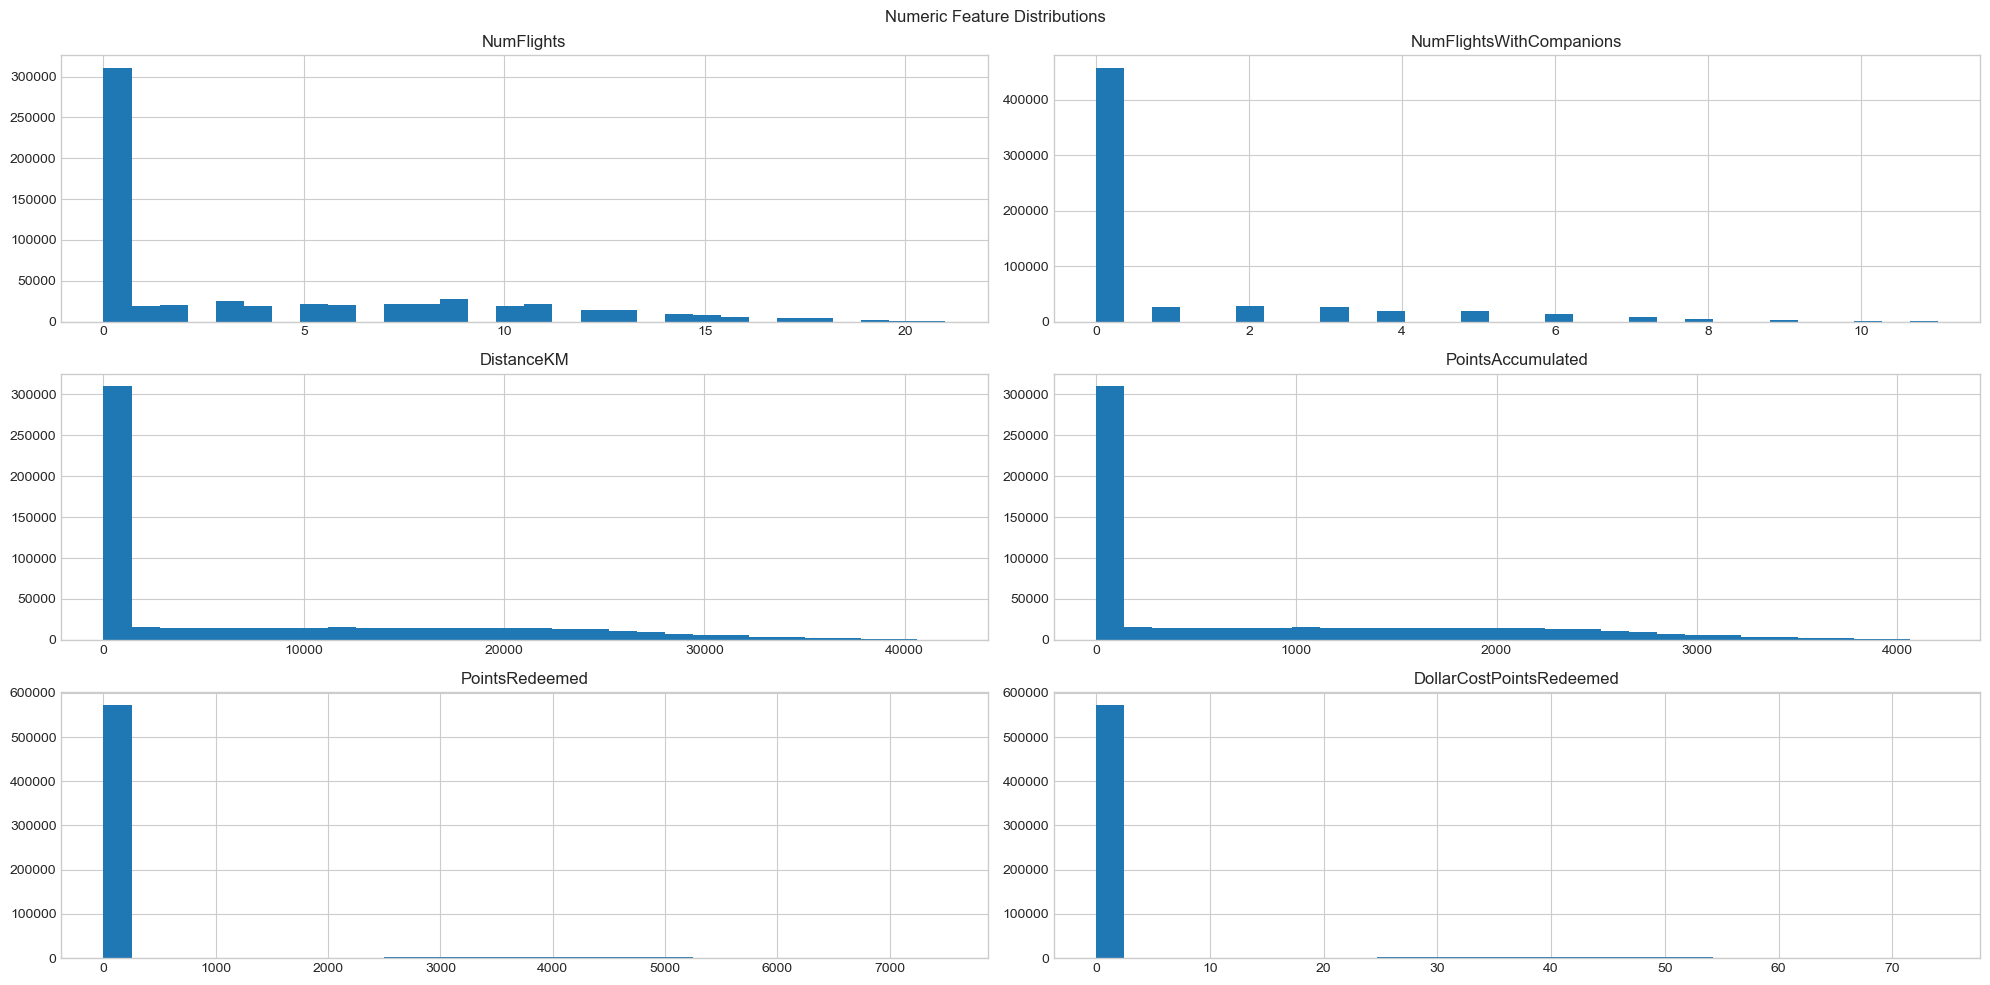

Número de outliers por variável:
NumFlights                    6919
NumFlightsWithCompanions    151670
DistanceKM                    1972
PointsAccumulated             1991
PointsRedeemed               35393
DollarCostPointsRedeemed     35393
dtype: int64


In [ ]:
numeric_flights = ["NumFlights", "NumFlightsWithCompanions", "DistanceKM", "PointsAccumulated", "PointsRedeemed", "DollarCostPointsRedeemed"]

# Histograms
flight[numeric_flights].hist(bins=30, figsize=(20, 10))
plt.suptitle("Numeric Feature Distributions")
plt.tight_layout()
plt.show()

# Identificar outliers usando IQR
Q1 = flight[numeric_flights].quantile(0.25)
Q3 = flight[numeric_flights].quantile(0.75)
IQR = Q3 - Q1

outliers = ((flight[numeric_flights] < (Q1 - 1.5 * IQR)) | (flight[numeric_flights] > (Q3 + 1.5 * IQR))).sum()
print("Número de outliers por variável:")
print(outliers)

### Multivariate analysis


In [ ]:
flight.groupby(["Year", "Month"])["NumFlights"].sum()

Year  Month
2019  1         39041
      2         39233
      3         53677
      4         46162
      5         54508
      6         68780
      7         76792
      8         66940
      9         52745
      10        49679
      11        46614
      12        65287
2020  1         47766
      2         47691
      3         64271
      4         55720
      5         65279
      6         80493
      7         89288
      8         78692
      9         63304
      10        60351
      11        56905
      12        77650
2021  1         49170
      2         48643
      3         66928
      4         56791
      5         76891
      6         92749
      7        104143
      8         90512
      9         73075
      10        69110
      11        65345
      12        88397
Name: NumFlights, dtype: int64

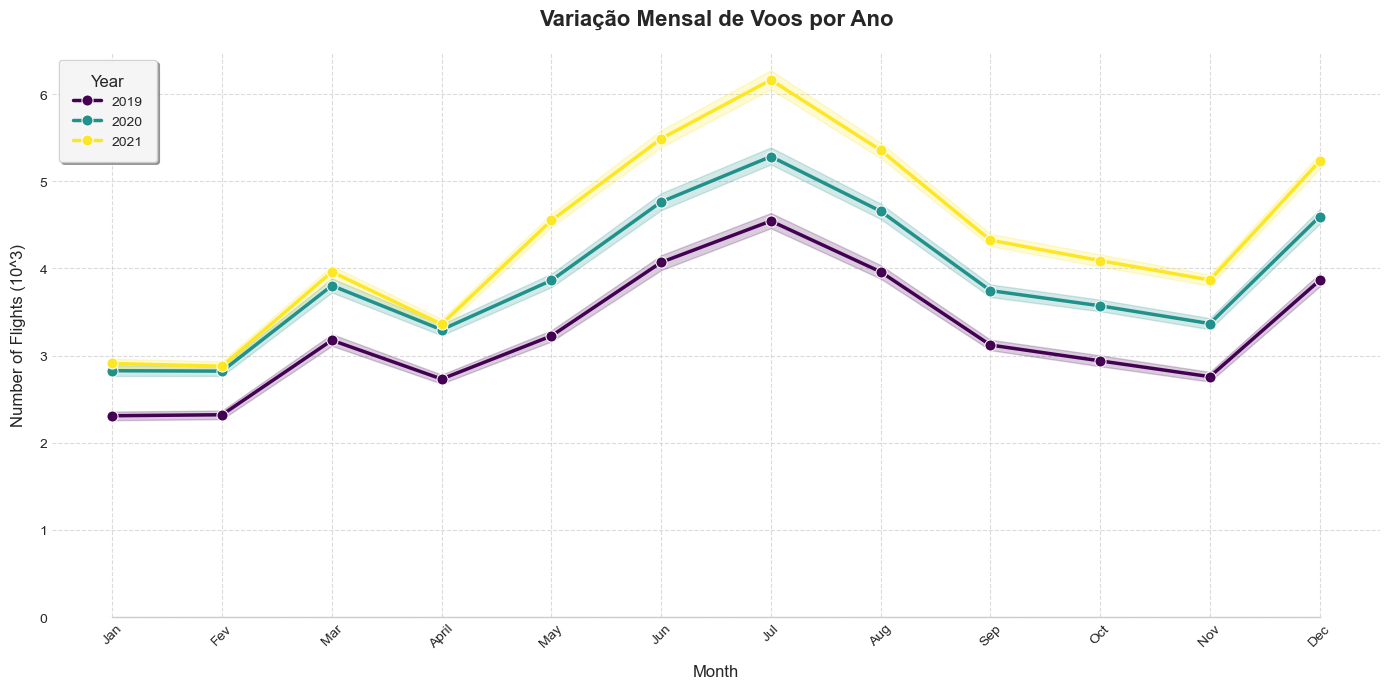

In [ ]:
# Choosing the style 
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 7))

# Create the graph
ax = sns.lineplot(
        data=flight,
        x="Month",
        y="NumFlights",
        hue="Year",
        palette="viridis",  # Color scheme
        linewidth=2.5,
        marker='o',         # Add markers
        markersize=8     
    )

# Melhorando os títulos e rótulos
plt.title('Variação Mensal de Voos por Ano',
            fontsize=16,
            fontweight='bold',
            pad=20)
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Number of Flights (10^3)', fontsize=12, labelpad=10)

# Create a legend
plt.legend(
        title='Year',
        title_fontsize=12,
        fontsize=10,
        frameon=True,
        fancybox=True,
        framealpha=0.9,
        shadow=True,
        borderpad=1
)

# Ajustando os eixos
plt.xticks(range(1, 13),
           ['Jan', 'Fev', 'Mar', 'April', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           rotation=45)
plt.ylim(0)

    # Adicionando grid
plt.grid(True, linestyle='--', alpha=0.7)

    # Ajustando as bordas
sns.despine(trim=True, left=True)

    # Ajustando o layout
plt.tight_layout()

    # Mostrando o gráfico
plt.show()

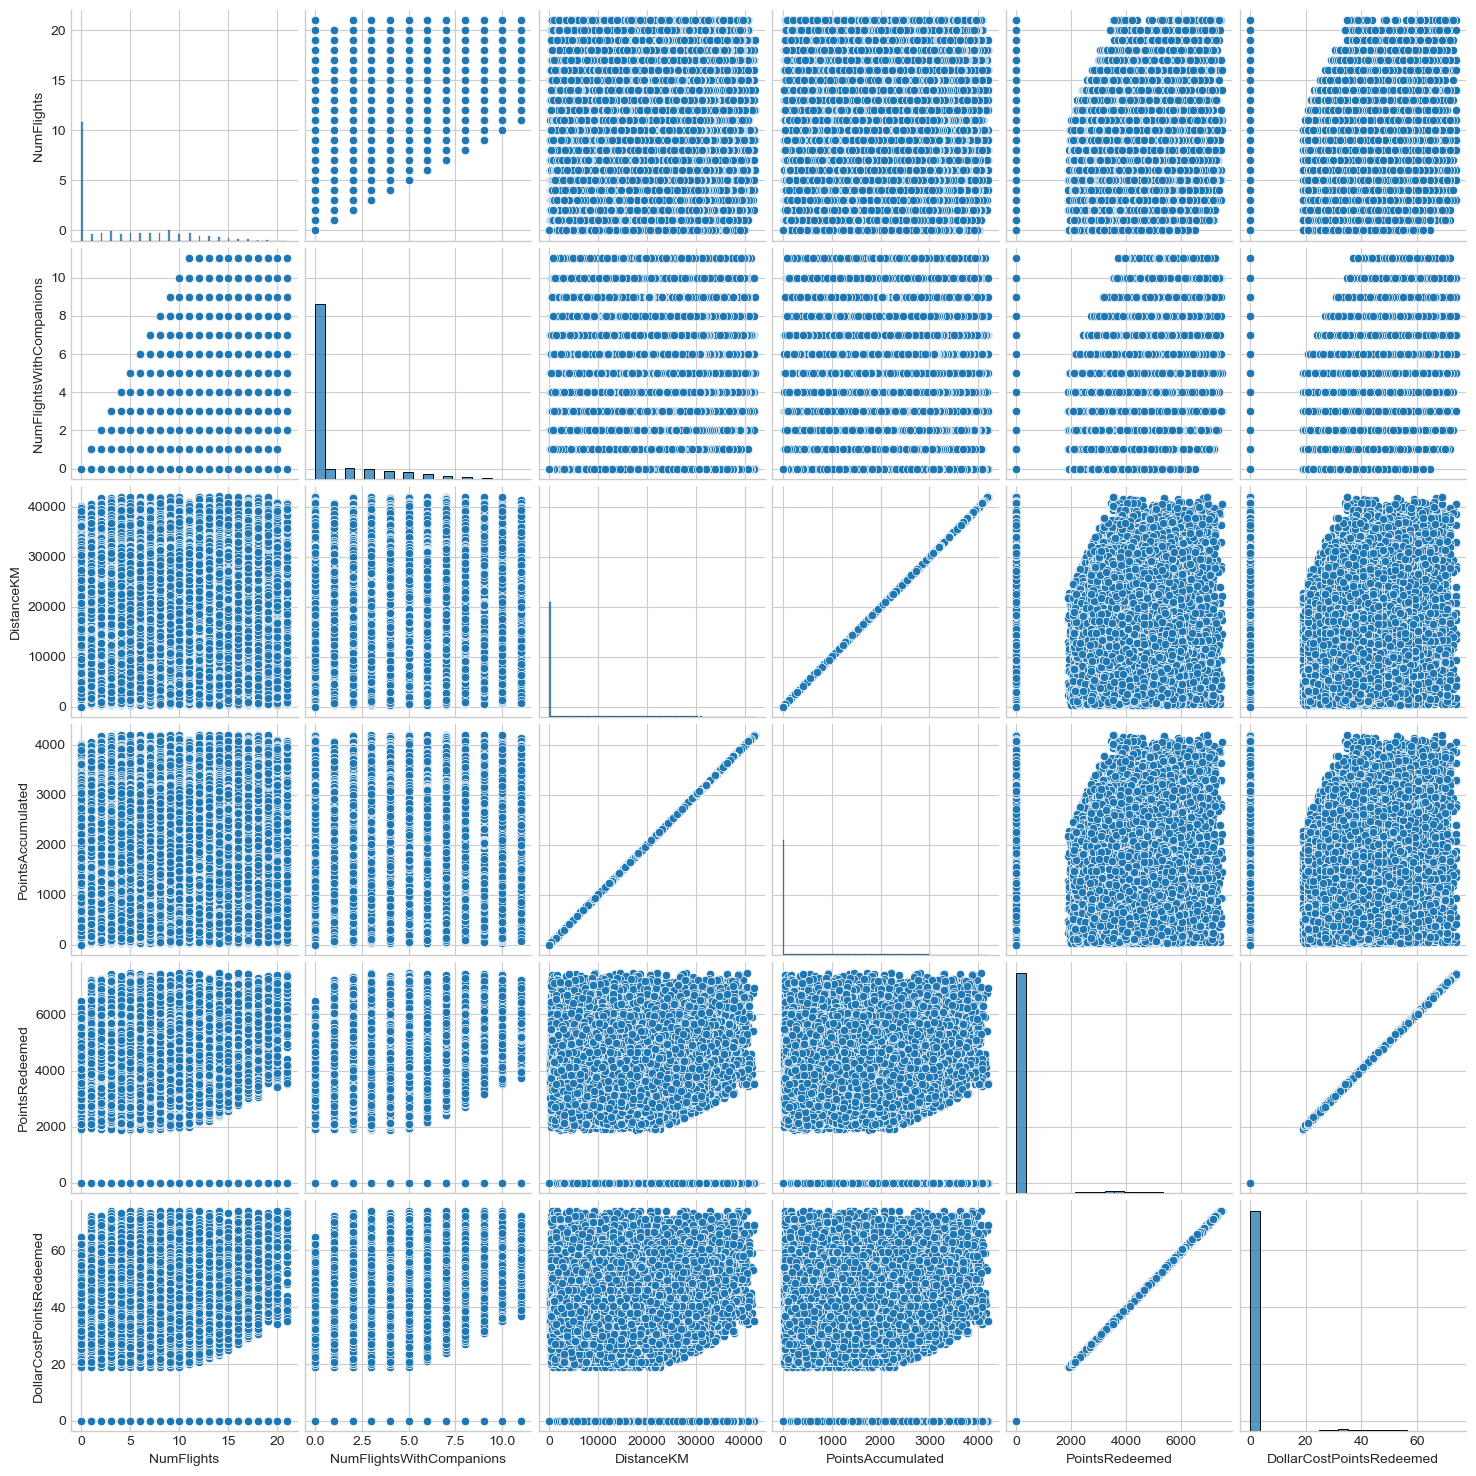

In [ ]:
sns.pairplot(data=flight, vars= numeric_flights)

plt.show()

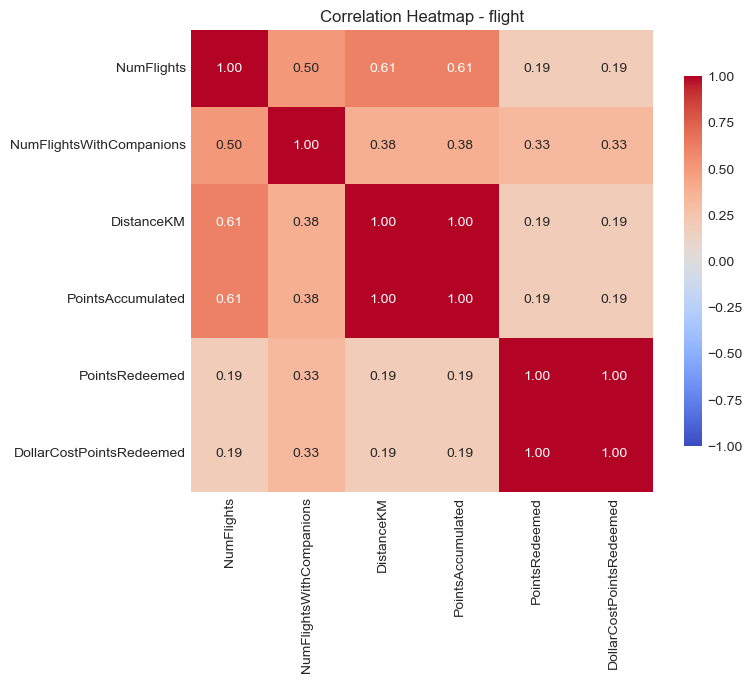

In [ ]:

correlation_matrix = flight[numeric_flights].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar valores dentro dos quadrados
            cmap='coolwarm',      # Esquema de cores (azul-vermelho)
            vmin=-1, vmax=1,      # Limites da escala de correlação
            center=0,             # Centralizar em 0
            square=True,          # Quadrados em vez de retângulos
            fmt='.2f',            # Formato com 2 casas decimais
            cbar_kws={'shrink': 0.8})  # Tamanho da barra de cores

plt.title("Correlation Heatmap - flight")
plt.show()
plt.show()

## Feature engineering

total_flights.rename(columns={"NumFlights": "TotalFlights"}, inplace=True)
customer = pd.merge(customer, total_flights, on="Loyalty#", how="left")
customer

total_DistanceKM = flight.groupby("Loyalty#")["DistanceKM"].sum().reset_index()
total_DistanceKM

total_DistanceKM.rename(columns={"DistanceKM": "TotalDistanceKM"}, inplace=True)
customer = pd.merge(customer, total_DistanceKM, on="Loyalty#", how="left")
customer

In [ ]:
def cumulative_customer(col):
    total = flight.groupby("Loyalty#")[col].sum().reset_index()
    return total

In [ ]:
total_flights = cumulative_customer("NumFlights")

In [ ]:
total_DistanceKM = cumulative_customer("DistanceKM")

In [ ]:
total_PointsAccumulated = cumulative_customer("PointsAccumulated")

In [ ]:
total_PointsRedeemed = cumulative_customer("PointsRedeemed")

In [ ]:
new_columns = [total_flights,total_DistanceKM,total_PointsAccumulated,total_PointsRedeemed]

for data in new_columns:
    customer = customer.merge(data, on="Loyalty#", how="left")
    
customer.head(3)

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,EnrollmentYear,EnrollmentMonth,EnrollmentYM,CancellationDateYear,CancellationDateMonth,CancellationYM,NumFlights,DistanceKM,PointsAccumulated,PointsRedeemed
0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,...,2019,2,2019-02,NaN,NaN,NaT,184,507054.9,50693,13517
1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,...,2019,3,2019-03,NaN,NaN,NaT,275,426827.4,42669,22457
2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,...,2017,7,2017-07,2021.0,1.0,2021-01,116,238376.1,23827,5479
